# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]['speed']
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-gentil
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | marcona
City not found. Skipping...
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | pravia
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | dunedin
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | platanos
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | loandjili
Processing Record 19 of Set 1 | hay river
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | f

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-gentil,-0.7193,8.7815,27.98,81,75,3.60,GA,1680475843
1,dikson,73.5069,80.5464,-26.50,95,100,5.75,RU,1680475833
2,cape town,-33.9258,18.4232,21.32,86,75,4.63,ZA,1680475800
3,georgetown,5.4112,100.3354,25.96,88,20,1.03,MY,1680475728
4,pravia,43.4906,-6.1508,8.37,81,40,1.03,ES,1680476382


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-gentil,-0.7193,8.7815,27.98,81,75,3.60,GA,1680475843
1,dikson,73.5069,80.5464,-26.50,95,100,5.75,RU,1680475833
2,cape town,-33.9258,18.4232,21.32,86,75,4.63,ZA,1680475800
3,georgetown,5.4112,100.3354,25.96,88,20,1.03,MY,1680475728
4,pravia,43.4906,-6.1508,8.37,81,40,1.03,ES,1680476382


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

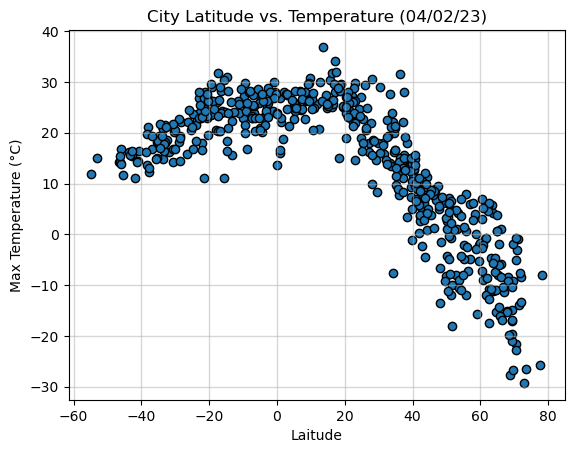

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", 
            label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
# Set title
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (°C)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

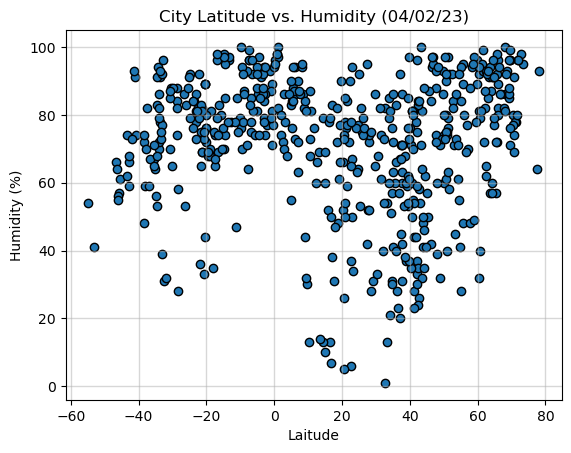

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black",  
            label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")
#set grid
plt.grid(linestyle='-', linewidth=1,alpha = 0.5)
# Set title
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

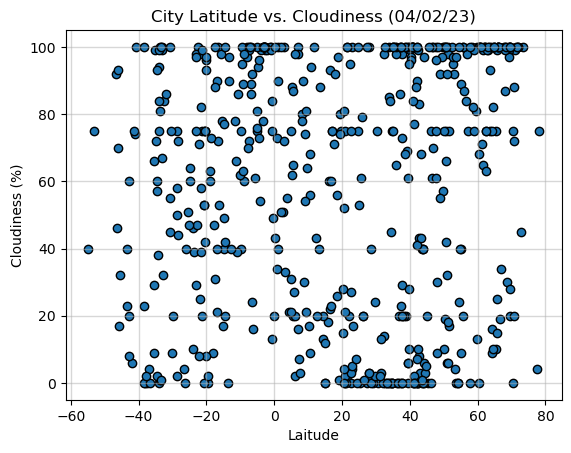

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black",  
            label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")
#set grid
plt.grid(linestyle='-', linewidth=1,alpha = 0.5)
# Set title
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

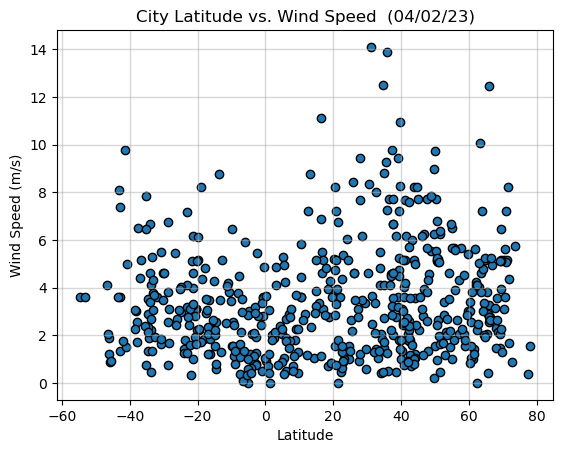

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black",  
            label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (m/s)")
#set grid
plt.grid(linestyle='-', linewidth=1,alpha = 0.5)
# Set title
plt.title("City Latitude vs. Wind Speed  (%s)" % time.strftime("%x"))
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-squared is: 0.5040900792686405


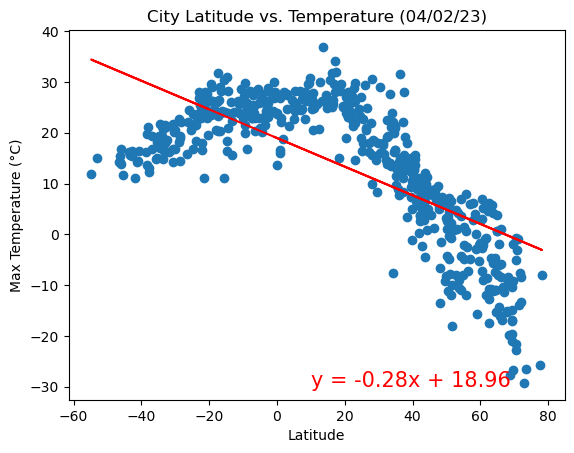

In [12]:
# Define a function to create Linear Regression plots
#Latitude VS Max Temperature

# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (°C)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0005233694625626945


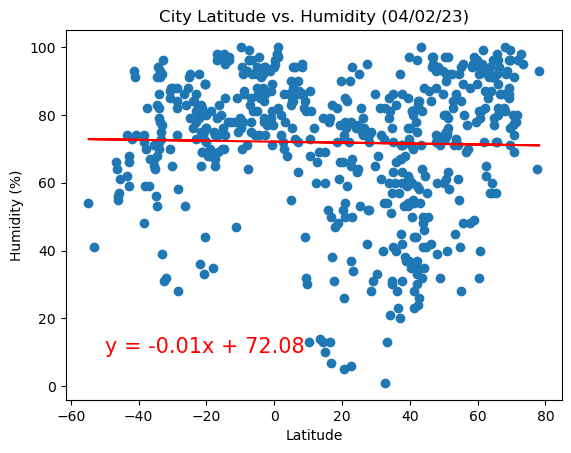

In [13]:
# Latitude Vs Humidity

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00516229435000193


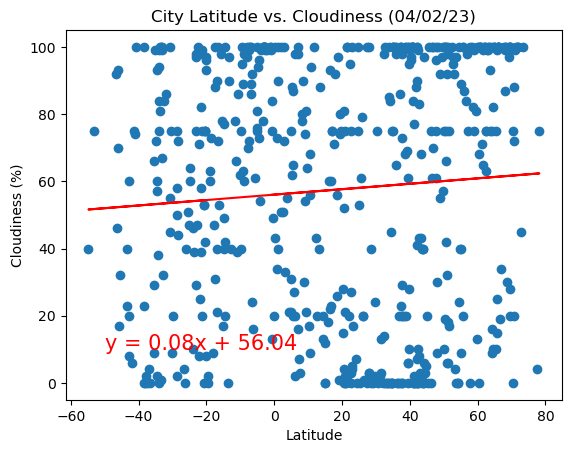

In [14]:
# Latitude Vs Cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.019211121879419882


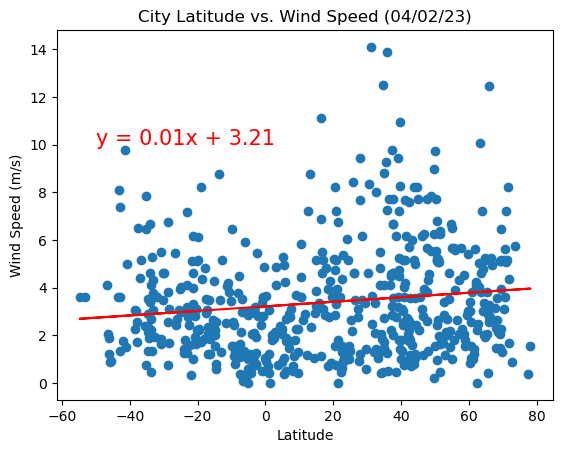

In [15]:
# Latitude Vs Wind Speed

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dikson,73.5069,80.5464,-26.50,95,100,5.75,RU,1680475833
3,georgetown,5.4112,100.3354,25.96,88,20,1.03,MY,1680475728
4,pravia,43.4906,-6.1508,8.37,81,40,1.03,ES,1680476382
6,chokurdakh,70.6333,147.9167,-21.67,91,72,5.60,RU,1680475843
9,nikolskoye,59.7035,30.7861,-2.06,96,100,5.39,RU,1680475835


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-gentil,-0.7193,8.7815,27.98,81,75,3.60,GA,1680475843
2,cape town,-33.9258,18.4232,21.32,86,75,4.63,ZA,1680475800
5,geraldton,-28.7667,114.6000,18.23,88,75,2.57,AU,1680475877
7,dunedin,-45.8742,170.5036,16.71,57,17,0.89,NZ,1680475777
8,saint-philippe,-21.3585,55.7679,24.77,82,98,4.00,RE,1680475816


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7855994476288398


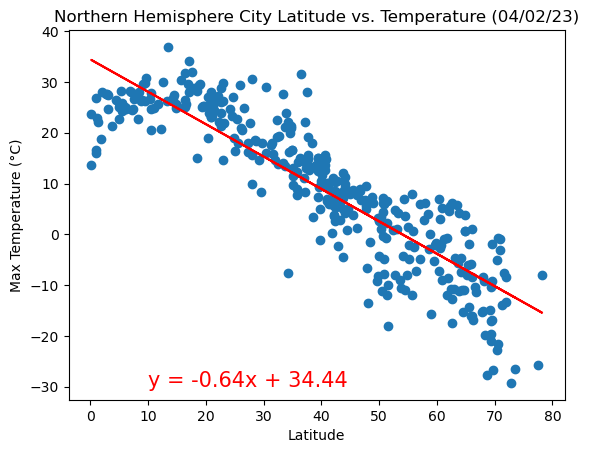

In [18]:
# Linear regression on Northern Hemisphere

# YOUR CODE HERE
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (°C)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.4878772563608794


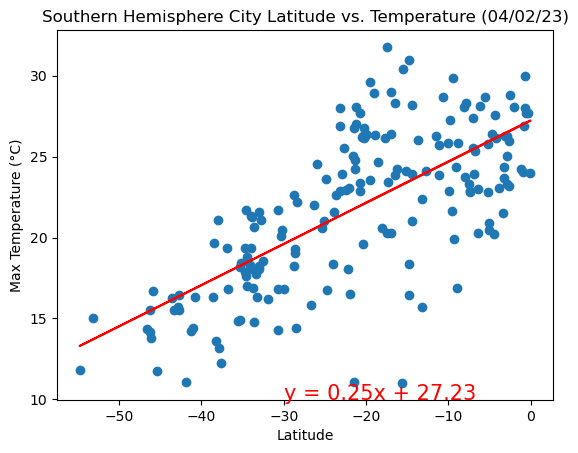

In [19]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (°C)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

We can see a very strong positive correlation between the Temperature and Latitude in the Northern Hemisphere whereas the Southern Hemisphere has moderate positive correlation between the two.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.03855371669058926


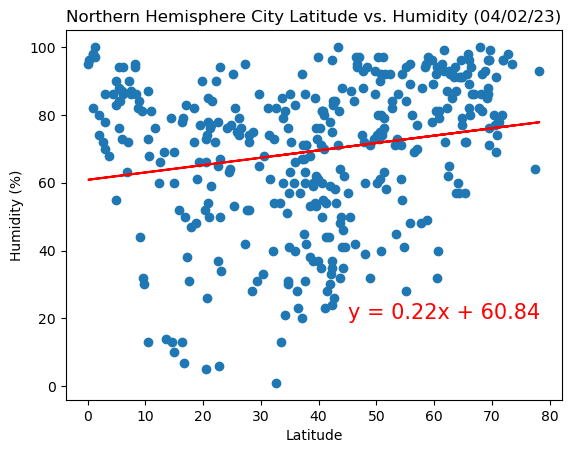

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.17537842612856805


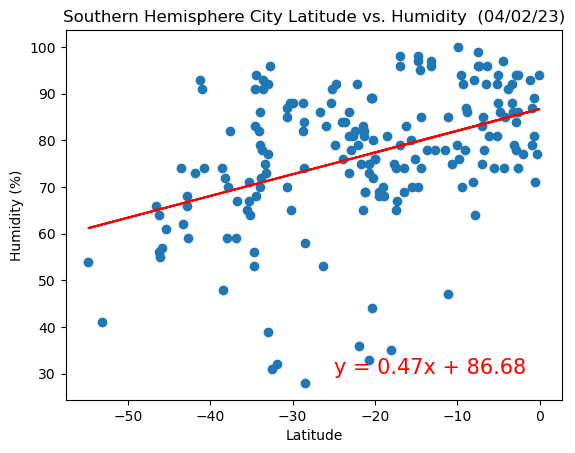

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere City Latitude vs. Humidity  (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a greater positive correlation between Latittude and Humidity in Southern Hemisphere in comparision to Northern Hemisphere which has weak positive correlation between the two.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0505342669346413


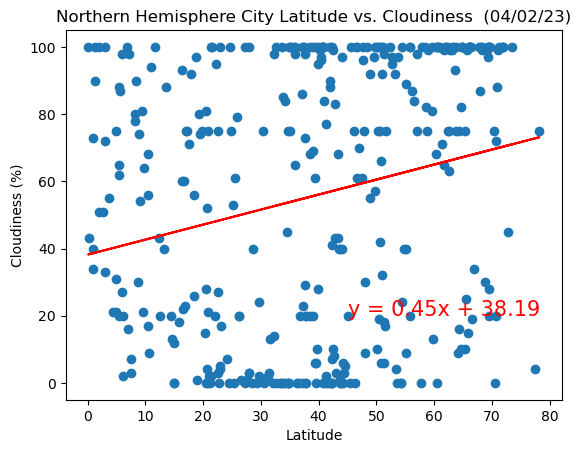

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere City Latitude vs. Cloudiness  (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.11601147888868227


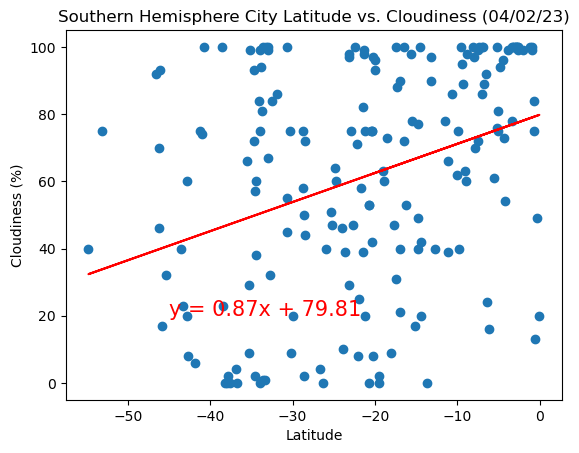

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a greater positive correlation between Latittude and Cloudiness in Southern Hemisphere in comparision to Northern Hemisphere which has weak positive correlation between the two.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.013412384124711834


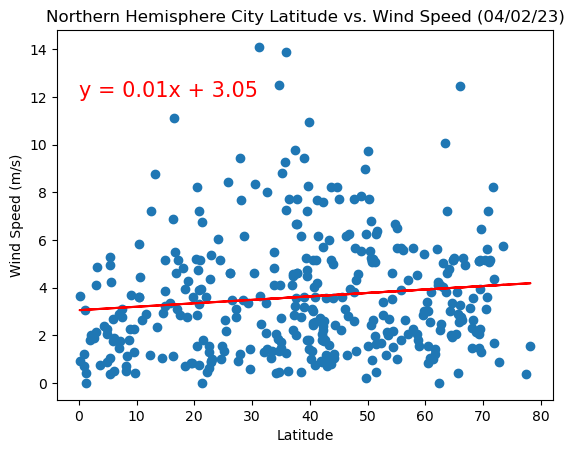

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.06307552218773914


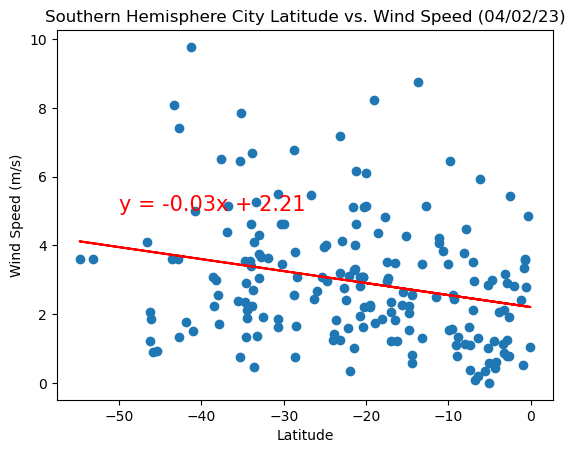

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The correalation between Latituda and Wind Speed in both Southern Hemisphere and Northern Hemisphere is very weak.